In [1]:
#Data Preprocessing
import numpy as np
import pandas as pd

#Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#Data Visulaization
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset
from sklearn.datasets import fetch_california_housing

#Train-Test-Split
from sklearn.model_selection import train_test_split

#Feature Scaling(Standardization)
from sklearn.preprocessing import StandardScaler

#Linear Regression Model
from sklearn.linear_model import LinearRegression

#Evaluation
from sklearn.metrics import mean_squared_error

In [2]:
#Loading the dataset
housing = fetch_california_housing(as_frame = True)
df = housing.frame

In [3]:
#Data Inspection
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.shape

(20640, 9)

In [5]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
#Target Variable
df['MedHouseVal'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [8]:
#Checking for NULL values
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [9]:
#Exploratary Data Analysis
df.corr()['MedHouseVal'].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

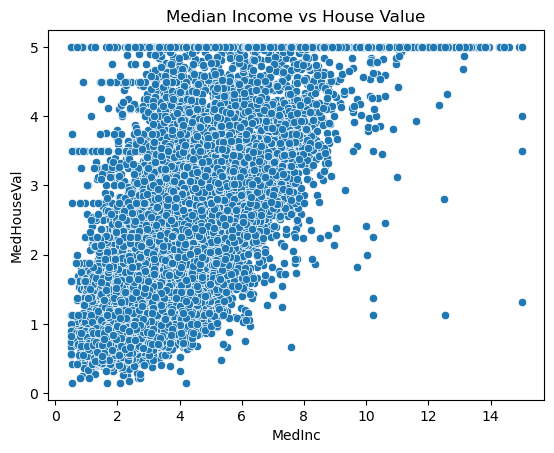

In [10]:
#Visualising
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df)
plt.title("Median Income vs House Value")
plt.show()

In [11]:
#Separating Features & Target
X = df.drop('MedInc', axis=1)
y = df['MedHouseVal']

In [12]:
#Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.25,
    random_state = 42
)

In [13]:
#Standardizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
#Training Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
#Making Predictions
y_pred = model.predict(X_test_scaled)

In [16]:
#Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE: ", mse)
print("RMSE: ", rmse)

MSE:  4.306226251117747
RMSE:  2.0751448747298937
